In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [3]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [5]:
xtrain = train_datagen.flow_from_directory('/content//drive/MyDrive/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 2168 images belonging to 1 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [7]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
# Fully connected layers (ANN)
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(4,activation='softmax')) # Output layer

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.save('Flower.h5')

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [32]:
img = image.load_img('/content/drive/MyDrive/flowers/flowers/dandelion/141935731_d26d600f4f_m.jpg',target_size=(64,64))

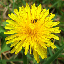

In [33]:
img

In [34]:
x = image.img_to_array(img)
x

array([[[104.,  91.,  59.],
        [125., 116.,  61.],
        [ 86.,  95.,  38.],
        ...,
        [ 74.,  95.,  39.],
        [118.,  87.,  43.],
        [109.,  83.,  34.]],

       [[140., 139.,  83.],
        [123., 114.,  59.],
        [ 77.,  91.,  42.],
        ...,
        [ 51.,  80.,  22.],
        [ 46.,  75.,  21.],
        [ 30.,  65.,   9.]],

       [[114., 141.,  74.],
        [128., 137.,  74.],
        [113., 116.,  61.],
        ...,
        [ 45.,  76.,  17.],
        [ 38.,  67.,  19.],
        [ 31.,  61.,   9.]],

       ...,

       [[ 53.,  92.,  39.],
        [ 49.,  84.,  26.],
        [ 61.,  94.,  37.],
        ...,
        [ 18.,  20.,   7.],
        [ 21.,  31.,   7.],
        [ 27.,  41.,  15.]],

       [[ 35.,  66.,  24.],
        [ 32.,  69.,  15.],
        [ 61.,  97.,  35.],
        ...,
        [ 23.,  21.,   6.],
        [ 16.,  18.,   4.],
        [ 19.,  28.,   7.]],

       [[ 47.,  78.,  18.],
        [ 30.,  64.,  14.],
        [ 48.,  

In [35]:
x = np.expand_dims(x,axis=0)
x

array([[[[104.,  91.,  59.],
         [125., 116.,  61.],
         [ 86.,  95.,  38.],
         ...,
         [ 74.,  95.,  39.],
         [118.,  87.,  43.],
         [109.,  83.,  34.]],

        [[140., 139.,  83.],
         [123., 114.,  59.],
         [ 77.,  91.,  42.],
         ...,
         [ 51.,  80.,  22.],
         [ 46.,  75.,  21.],
         [ 30.,  65.,   9.]],

        [[114., 141.,  74.],
         [128., 137.,  74.],
         [113., 116.,  61.],
         ...,
         [ 45.,  76.,  17.],
         [ 38.,  67.,  19.],
         [ 31.,  61.,   9.]],

        ...,

        [[ 53.,  92.,  39.],
         [ 49.,  84.,  26.],
         [ 61.,  94.,  37.],
         ...,
         [ 18.,  20.,   7.],
         [ 21.,  31.,   7.],
         [ 27.,  41.,  15.]],

        [[ 35.,  66.,  24.],
         [ 32.,  69.,  15.],
         [ 61.,  97.,  35.],
         ...,
         [ 23.,  21.,   6.],
         [ 16.,  18.,   4.],
         [ 19.,  28.,   7.]],

        [[ 47.,  78.,  18.],
       

In [36]:
model.predict(x)

array([[1.0000000e+00, 1.2059610e-19, 1.6337560e-25, 1.9850155e-08]],
      dtype=float32)

In [37]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'daisy'

In [38]:
img = image.load_img('/content/drive/MyDrive/flowers/flowers/dandelion/10683189_bd6e371b97.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'daisy'